# Land Cover Classification using Deep Learning on RGB Satellite Images

## Data Preprocessing

In [1]:
#Import needed libraries
import os, shutil
from PIL import Image, ImageOps

#Standard Libraries
import numpy as np
import pandas as pd

# Visualizations
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report, ConfusionMatrixDisplay

#TensorFlow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras import models, layers, optimizers, regularizers
from tensorflow.keras import Model
from tensorflow.data.experimental import cardinality
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#Transfer Learning
from keras.applications import ResNet50, VGG19, VGG16

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-11-28 22:17:51.548727: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-28 22:17:51.861940: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-28 22:17:52.163973: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-28 22:17:52.412952: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-28 22:17:52.478538: E external/loc

### Import Data and Train/Validation/Test Split

Since the data is only available as one folder containing subclass folders of each image class, we have to split the data into train and test sets before importing it. 

In [2]:
#List image path for all categories
data_AnnualCrop = 'EuroSAT_RGB/AnnualCrop'
data_Forest = 'EuroSAT_RGB/Forest'
data_HerbaceousVegetation = 'EuroSAT_RGB/HerbaceousVegetation'
data_Highway = 'EuroSAT_RGB/Highway'
data_Industrial = 'EuroSAT_RGB/Industrial'
data_Pasture = 'EuroSAT_RGB/Pasture'
data_PermanentCrop = 'EuroSAT_RGB/PermanentCrop'
data_Residential = 'EuroSAT_RGB/Residential'
data_River = 'EuroSAT_RGB/River'
data_SeaLake = 'EuroSAT_RGB/SeaLake'


new_dir = 'data/split/'

In [3]:
#Create objects that store all the relevant image names.
imgs_AnnualCrop = [file for file in os.listdir(data_AnnualCrop) if file.endswith('.jpg')]
imgs_Forest = [file for file in os.listdir(data_Forest) if file.endswith('.jpg')]
imgs_HerbaceousVegetation = [file for file in os.listdir(data_HerbaceousVegetation) if file.endswith('.jpg')]
imgs_Highway = [file for file in os.listdir(data_Highway) if file.endswith('.jpg')]
imgs_Industrial = [file for file in os.listdir(data_Industrial) if file.endswith('.jpg')]
imgs_Pasture = [file for file in os.listdir(data_Pasture) if file.endswith('.jpg')]
imgs_PermanentCrop = [file for file in os.listdir(data_PermanentCrop) if file.endswith('.jpg')]
imgs_Residential = [file for file in os.listdir(data_Residential) if file.endswith('.jpg')]
imgs_River = [file for file in os.listdir(data_River) if file.endswith('.jpg')]
imgs_SeaLake = [file for file in os.listdir(data_SeaLake) if file.endswith('.jpg')]

In [5]:
#Set up the Train folder and subfolders
train_folder = os.path.join(new_dir, 'train')
train_AnnualCrop = os.path.join(train_folder, 'AnnualCrop')
train_Forest = os.path.join(train_folder, 'Forest')
train_HerbaceousVegetation = os.path.join(train_folder, 'HerbaceousVegetation')
train_Highway = os.path.join(train_folder, 'Highway')
train_Industrial = os.path.join(train_folder, 'Industrial')
train_Pasture = os.path.join(train_folder, 'Pasture')
train_PermanentCrop = os.path.join(train_folder, 'PermanentCrop')
train_Residential = os.path.join(train_folder, 'Residential')
train_River = os.path.join(train_folder, 'River')
train_SeaLake = os.path.join(train_folder, 'SeaLake')


In [6]:
#Set up the Test folder and subfolders
test_folder = os.path.join(new_dir, 'test')
test_AnnualCrop = os.path.join(test_folder, 'AnnualCrop')
test_Forest = os.path.join(test_folder, 'Forest')
test_HerbaceousVegetation = os.path.join(test_folder, 'HerbaceousVegetation')
test_Highway = os.path.join(test_folder, 'Highway')
test_Industrial = os.path.join(test_folder, 'Industrial')
test_Pasture = os.path.join(test_folder, 'Pasture')
test_PermanentCrop = os.path.join(test_folder, 'PermanentCrop')
test_Residential = os.path.join(test_folder, 'Residential')
test_River = os.path.join(test_folder, 'River')
test_SeaLake = os.path.join(test_folder, 'SeaLake')

In [7]:
# Make the Train directories(folders)
os.mkdir(train_folder)
os.mkdir(train_AnnualCrop)
os.mkdir(train_Forest)
os.mkdir(train_HerbaceousVegetation)
os.mkdir(train_Highway)
os.mkdir(train_Industrial)
os.mkdir(train_Pasture)
os.mkdir(train_PermanentCrop)
os.mkdir(train_Residential)
os.mkdir(train_River)
os.mkdir(train_SeaLake)

# Make the Test directories(folders)
os.mkdir(test_folder)
os.mkdir(test_AnnualCrop)
os.mkdir(test_Forest)
os.mkdir(test_HerbaceousVegetation)
os.mkdir(test_Highway)
os.mkdir(test_Industrial)
os.mkdir(test_Pasture)
os.mkdir(test_PermanentCrop)
os.mkdir(test_Residential)
os.mkdir(test_River)
os.mkdir(test_SeaLake)

In [8]:
# Compile 80% of images into folders- Train
imgs = imgs_AnnualCrop[:2400]
for img in imgs:
    origin = os.path.join(data_AnnualCrop, img)
    destination = os.path.join(train_AnnualCrop, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_Forest[:2400]
for img in imgs:
    origin = os.path.join(data_Forest, img)
    destination = os.path.join(train_Forest, img)
    shutil.copyfile(origin, destination)

imgs = imgs_HerbaceousVegetation[:2400]
for img in imgs:
    origin = os.path.join(data_HerbaceousVegetation, img)
    destination = os.path.join(train_HerbaceousVegetation, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_Highway[:2000]
for img in imgs:
    origin = os.path.join(data_Highway, img)
    destination = os.path.join(train_Highway, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_Industrial[:2000]
for img in imgs:
    origin = os.path.join(data_Industrial, img)
    destination = os.path.join(train_Industrial, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_Pasture[:1600]
for img in imgs:
    origin = os.path.join(data_Pasture, img)
    destination = os.path.join(train_Pasture, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_PermanentCrop[:2000]
for img in imgs:
    origin = os.path.join(data_PermanentCrop, img)
    destination = os.path.join(train_PermanentCrop, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_Residential[:2400]
for img in imgs:
    origin = os.path.join(data_Residential, img)
    destination = os.path.join(train_Residential, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_River[:2000]
for img in imgs:
    origin = os.path.join(data_River, img)
    destination = os.path.join(train_River, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_SeaLake[:2400]
for img in imgs:
    origin = os.path.join(data_SeaLake, img)
    destination = os.path.join(train_SeaLake, img)
    shutil.copyfile(origin, destination)

In [9]:
# Compile other 20% of images into folders- Test
imgs = imgs_AnnualCrop[2400:] #600
for img in imgs:
    origin = os.path.join(data_AnnualCrop, img)
    destination = os.path.join(test_AnnualCrop, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_Forest[2400:] #600
for img in imgs:
    origin = os.path.join(data_Forest, img)
    destination = os.path.join(test_Forest, img)
    shutil.copyfile(origin, destination)

imgs = imgs_HerbaceousVegetation[2400:] #600
for img in imgs:
    origin = os.path.join(data_HerbaceousVegetation, img)
    destination = os.path.join(test_HerbaceousVegetation, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_Highway[2000:] #500
for img in imgs:
    origin = os.path.join(data_Highway, img)
    destination = os.path.join(test_Highway, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_Industrial[2000:] #500
for img in imgs:
    origin = os.path.join(data_Industrial, img)
    destination = os.path.join(test_Industrial, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_Pasture[1600:] #400
for img in imgs:
    origin = os.path.join(data_Pasture, img)
    destination = os.path.join(test_Pasture, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_PermanentCrop[2000:] #500
for img in imgs:
    origin = os.path.join(data_PermanentCrop, img)
    destination = os.path.join(test_PermanentCrop, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_Residential[2400:] #600
for img in imgs:
    origin = os.path.join(data_Residential, img)
    destination = os.path.join(test_Residential, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_River[2000:] #500
for img in imgs:
    origin = os.path.join(data_River, img)
    destination = os.path.join(test_River, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_SeaLake[2400:] #600
for img in imgs:
    origin = os.path.join(data_SeaLake, img)
    destination = os.path.join(test_SeaLake, img)
    shutil.copyfile(origin, destination)

In [10]:
train_folder = 'data/split/train'
test_folder = 'data/split/test'

# Normalize images
train_gen = ImageDataGenerator(rescale=1./255, validation_split = 0.125)
test_gen = ImageDataGenerator(rescale=1./255)

#Import data as 70% Train (10% Validation of orginal data set) and 20% Test
train_generator = train_gen.flow_from_directory(train_folder,
                                                class_mode = 'categorical', 
                                                subset ='training', 
                                                batch_size=128,
                                                shuffle=True,
                                                seed=42)
                                               
val_generator= train_gen.flow_from_directory(train_folder,
                                             class_mode= 'categorical',
                                             subset = "validation",
                                             batch_size=128,
                                             shuffle=True,
                                             seed=42)

test_generator= test_gen.flow_from_directory(test_folder,
                                              class_mode= 'categorical',
                                              batch_size=128,
                                              shuffle=False,
                                              seed=42)

Found 18900 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [11]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

### Explore Data

Let's look at our image counts of each class across the train, validation, and test datasets.

In [12]:
#Confirm class balance for train and test
train_classes = train_generator.classes
val_classes = val_generator.classes
test_classes = test_generator.classes

#Look at image distribution by class across train, test, and validation sets.
train_class, train_count = np.unique(train_classes, return_counts=True)
val_class, val_count = np.unique(val_classes, return_counts=True)
test_class, test_count = np.unique(test_classes, return_counts=True)

print('Train ~ {}'.format(list(zip(train_class, train_count))))
print('Validation ~ {}'.format(list(zip(val_class, val_count))))
print('Test ~ {}'.format(list(zip(test_class, test_count))))

Train ~ [(0, 2100), (1, 2100), (2, 2100), (3, 1750), (4, 1750), (5, 1400), (6, 1750), (7, 2100), (8, 1750), (9, 2100)]
Validation ~ [(0, 300), (1, 300), (2, 300), (3, 250), (4, 250), (5, 200), (6, 250), (7, 300), (8, 250), (9, 300)]
Test ~ [(0, 600), (1, 600), (2, 600), (3, 500), (4, 500), (5, 400), (6, 500), (7, 600), (8, 500), (9, 600)]


In [13]:
#Checking the classes in our train data 
train_class_names = train_generator.class_indices
print('Train:', train_class_names)

#Checking the classes in our validation data
val_class_names = val_generator.class_indices
print('Validation:', val_class_names)

#Checking the classes in our test data
test_class_names = test_generator.class_indices
print('Train:', test_class_names)

Train: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Validation: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Train: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [14]:
# Preview the shape of both the images and labels for both the train, validation, and test sets (8 objects total)
print("Train")
print(np.shape(train_images))
print(np.shape(train_labels))
print("Validation")
print(np.shape(val_images))
print(np.shape(val_labels))
print("Test")
print(np.shape(test_images))
print(np.shape(test_labels))

Train
(128, 256, 256, 3)
(128, 10)
Validation
(128, 256, 256, 3)
(128, 10)
Test
(128, 256, 256, 3)
(128, 10)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


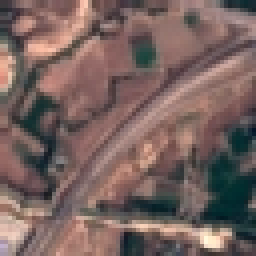

In [15]:
# Preview a train data image
print(train_labels[1])
array_to_img(train_images[1])

The above image is an example of the "road" class.

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


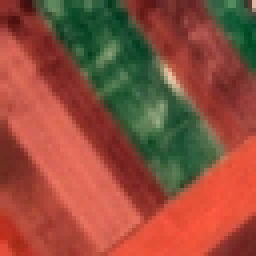

In [16]:
# Preview a test data image
print(test_labels[1])
array_to_img(test_images[1])

The above image is an example of the "Annual Crop" class.